__Customer Segmentation__

why we do customer segmentation?
Because we cannot treat every customer same way(with same content & same importance). They will find someone else who understands them well.Customers who use your platform have different needs and diffrent profile. We should adapt our actions according to that.
We can do different segmentation based on what we are trying to achieve.for eg. if we are trying to retention rate we can do segmentation based on churn probability.One of common segmentation is RFM Analysis Recency,Frequency & Monetary value  

In RFM Analysis we will have three segments namely:-
- __Low Value__ - These are the customers who are not active users,Not frequent buyer/visitor and create low-zero maybe negative revenue
- __Mid Value__ - Middle of everything. fairly active but not as much as high value,fairly frequent buyer/visitor and create mid range revenue.
- __High Value__ - Highly active , highly frequent and create very high revenue

__Recency__ to calculate recency, we first find the most recent purchase date and then see how many days that customer is 
inactive for. After having no. of inactive days we will do K-Means clustering in order to assign each customer a recency score

In [1]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("OnlineRetail.csv",encoding='latin1')
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [4]:
data_uk = pd.DataFrame(data.query("Country=='United Kingdom'").reset_index(drop=True))

In [5]:
data_user = pd.DataFrame(data["CustomerID"].unique())
data_user.columns = ["CustomerID"]
data_user.head(10)

,CustomerID
0,17850.0
1,13047.0
2,12583.0
3,13748.0
4,15100.0
5,15291.0
6,14688.0
7,17809.0
8,15311.0
9,14527.0


In [6]:
data_max_purchase = data_uk.groupby('CustomerID')['InvoiceDate'].max().reset_index()
data_max_purchase.columns  = ["CustomerID","Max Purchase Date"]
data_max_purchase.head()

,CustomerID,Max Purchase Date
0,12346.0,2011-01-18 10:17:00
1,12747.0,2011-12-07 14:34:00
2,12748.0,2011-12-09 12:20:00
3,12749.0,2011-12-06 09:56:00
4,12820.0,2011-12-06 15:12:00


In [7]:
# We take our obeservation point as the maximum of max purchase date
data_max_purchase["Recency"] = (data_max_purchase["Max Purchase Date"].max() - data_max_purchase["Max Purchase Date"]).dt.days
data_max_purchase.head(10)

,CustomerID,Max Purchase Date,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12747.0,2011-12-07 14:34:00,1
2,12748.0,2011-12-09 12:20:00,0
3,12749.0,2011-12-06 09:56:00,3
4,12820.0,2011-12-06 15:12:00,2
5,12821.0,2011-05-09 15:51:00,213
6,12822.0,2011-09-30 10:04:00,70
7,12823.0,2011-09-26 07:35:00,74
8,12824.0,2011-10-11 12:49:00,59
9,12826.0,2011-12-07 10:25:00,2


In [8]:
data_max_purchase.Recency.describe()

count    3950.000000
mean       90.778481
std       100.230349
min         0.000000
25%        16.000000
50%        49.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

In [10]:
#Here we can find that the maximum number of customers have 49 days as the recency
data_max_purchase.Recency.median()

49.0

Here we can find that the mean recency for a customer for this ecommerce platform is 90 days. This can be seen in the histogram below also.

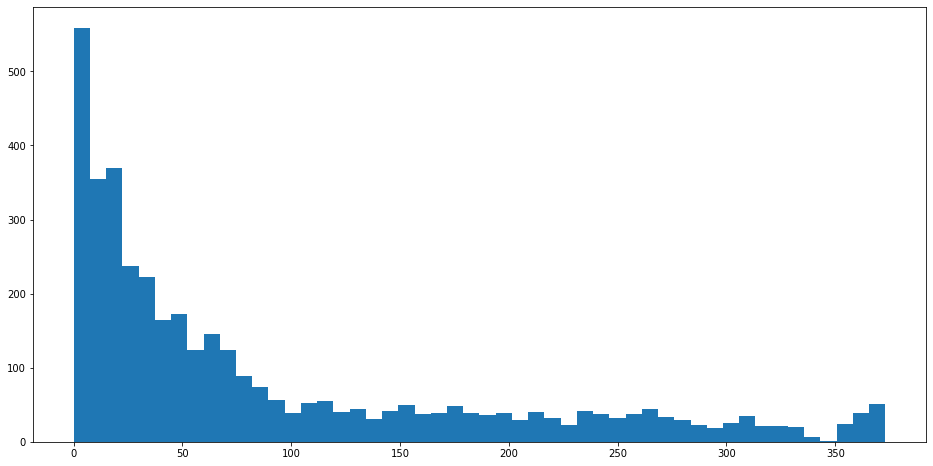

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
plt.hist(data_max_purchase["Recency"],bins=50)
plt.show()

Now we will apply k-means clustering in order to assign each customer a recency score. But, first we will need to determine the
optimum number of clusters. For that we will use Elbow Method.Elbow method simply tell the optimal number of clusters based on 
optimal inertia.

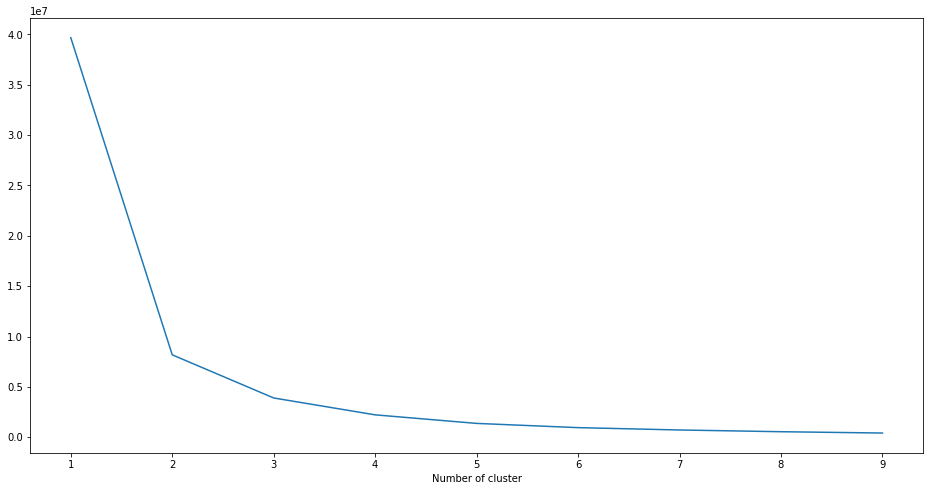

In [12]:
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None 
sse={}

df_recency = data_max_purchase[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency.loc[:,"clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

It looks like 3 is the optimal number of clusters. Based on the business requirements we can go for lesser or more clusters.

In [13]:
from sklearn.cluster import KMeans
kmeans =KMeans(n_clusters =4)
kmeans.fit(data_max_purchase[['Recency']])
data_max_purchase['RecencyCluster'] = kmeans.predict(data_max_purchase[['Recency']])

In [15]:
#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [16]:
data_max_purchase = order_cluster('RecencyCluster', 'Recency',data_max_purchase,False)

In [17]:
# Kmeans doesnot assign cluster number in an ordered way therefore, we can't say that cluster 0 is worst and cluster 4 is best.
# order cluster method defined above does this for us. and we can see that as cluster number is increasing the mean recency is
#decreasing therefore cluster 3 is best and cluster 0 is worst.
data_max_purchase.groupby('RecencyCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,478.0,304.393305,41.183489,245.0,266.25,300.0,336.00,373.0
1,568.0,184.625000,31.753602,132.0,156.75,184.0,211.25,244.0
2,954.0,77.679245,22.850898,48.0,59.00,72.5,93.00,131.0
3,1950.0,17.488205,13.237058,0.0,6.00,16.0,28.00,47.0


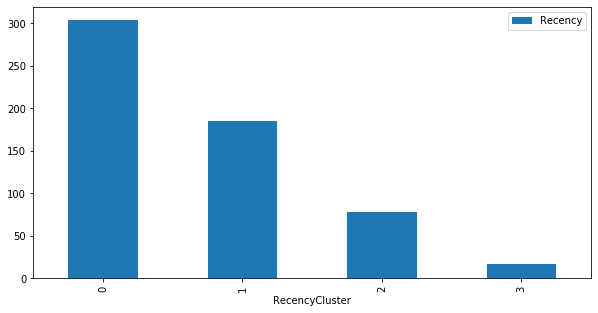

In [21]:
df_plot = data_max_purchase.groupby('RecencyCluster').Recency.mean().reset_index()
fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(x='RecencyCluster',y='Recency',kind ='bar',ax=ax)
plt.show()

__Frequency__- In order to calculate frequency we need to calculate the total number of orders per customer

In [22]:
#get order counts for each user and create a dataframe with it
data_frequency = data_uk.groupby('CustomerID').InvoiceDate.count().reset_index()
data_frequency.columns = ['CustomerID','Frequency']
data_frequency.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4642
3,12749.0,231
4,12820.0,59
5,12821.0,6
6,12822.0,47
7,12823.0,5
8,12824.0,25
9,12826.0,94


Here we can see that most of the customers have low frequency however we do have some very frequent buyers.We find that the mean frequency is around 91 however most of the customers have frequency of 41

In [42]:
data_frequency.Frequency.describe()

count    3950.000000
mean       91.614684
std       220.557389
min         1.000000
25%        17.000000
50%        41.000000
75%       101.000000
max      7983.000000
Name: Frequency, dtype: float64

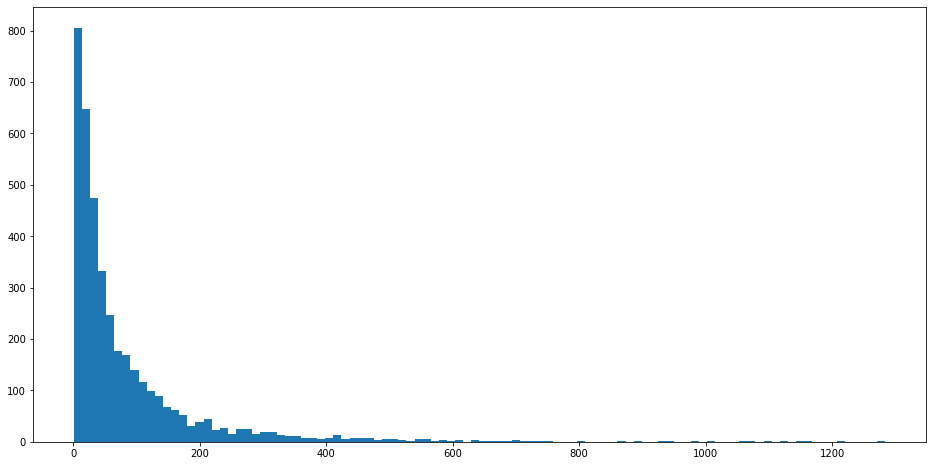

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
plt.hist(data_frequency[data_frequency["Frequency"]<1500]["Frequency"],bins=100)
plt.show()

In [24]:
#add this data to our main dataframe
data_user = pd.merge(data_max_purchase, data_frequency, on='CustomerID')

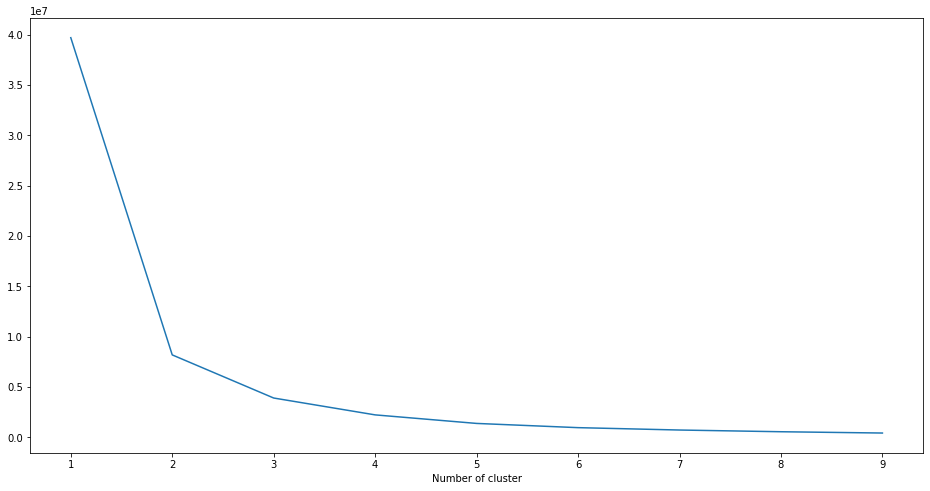

In [25]:
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None 
sse={}

df_freq = data_user[['Recency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency.loc[:,"clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [26]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_user[['Frequency']])
data_user['FrequencyCluster'] = kmeans.predict(data_user[['Frequency']])

In [27]:
data_user = order_cluster('FrequencyCluster', 'Frequency',data_user,True)

In [28]:
data_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,3496.0,49.525744,44.954212,1.0,15.0,33.0,73.0,190.0
1,429.0,331.221445,133.856510,191.0,228.0,287.0,399.0,803.0
2,22.0,1313.136364,505.934524,872.0,988.5,1140.0,1452.0,2782.0
3,3.0,5917.666667,1805.062418,4642.0,4885.0,5128.0,6555.5,7983.0


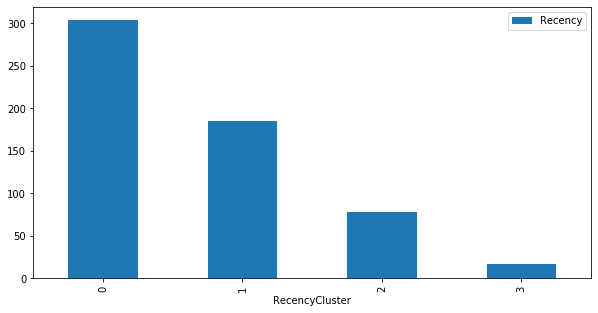

In [40]:
df_plot = data_max_purchase.groupby('RecencyCluster').Recency.mean().reset_index()
fig, ax = plt.subplots(figsize=(10,5))
df_plot.plot(x='RecencyCluster',y='Recency',kind ='bar',ax=ax)
plt.show()

__Revenue__ - we will calculate revenue for each customer

In [29]:
#calculate revenue for each customer
data_uk['Revenue'] = data_uk['UnitPrice'] * data_uk['Quantity']
data_revenue = data_uk.groupby('CustomerID').Revenue.sum().reset_index()

In [30]:
#merge it with our main dataframe
data_user = pd.merge(data_user, data_revenue, on='CustomerID')

Here we found that the average revenue a customer is generating is around 1700 dollars while most ofcustomers is generating a revenue around 600 dollars

In [43]:
data_revenue.Revenue.describe()

count      3950.000000
mean       1713.385669
std        6548.608224
min       -4287.630000
25%         282.255000
50%         627.060000
75%        1521.782500
max      256438.490000
Name: Revenue, dtype: float64

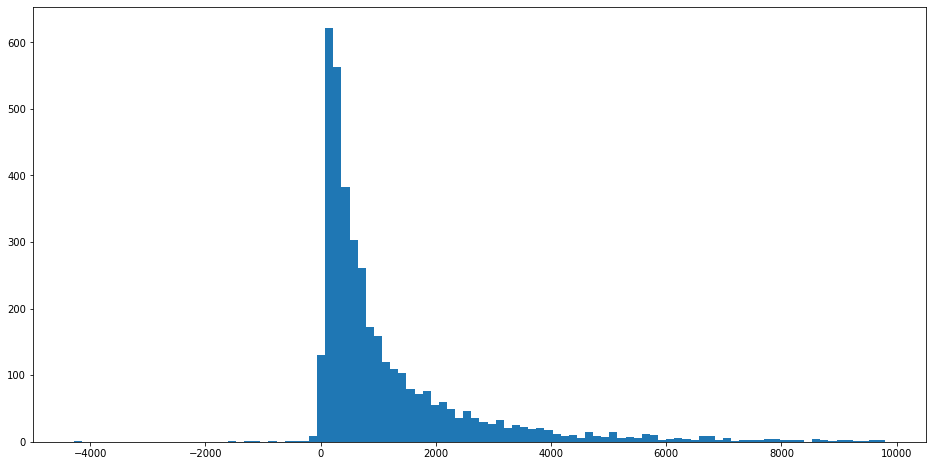

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
plt.hist(data_revenue[data_revenue["Revenue"]<10000]["Revenue"],bins=100)
plt.show()

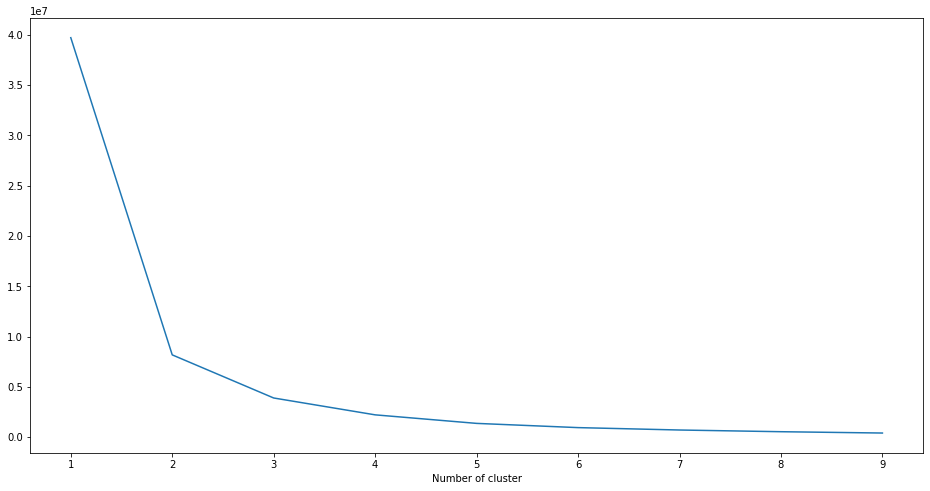

In [32]:
from sklearn.cluster import KMeans
pd.options.mode.chained_assignment = None 
sse={}

df_rev = data_user[['Frequency']]

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_recency)
    df_recency.loc[:,"clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [33]:
#apply clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_user[['Revenue']])
data_user['RevenueCluster'] = kmeans.predict(data_user[['Revenue']])

In [34]:
#order the cluster numbers
data_user = order_cluster('RevenueCluster', 'Revenue',data_user,True)

In [35]:
#show details of the dataframe
data_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,3687.0,907.254414,921.910820,-4287.63,263.115,572.56,1258.220,4314.72
1,234.0,7760.699530,3637.173671,4330.67,5161.485,6549.38,9142.305,21535.90
2,27.0,43070.445185,15939.249588,25748.35,28865.490,36351.42,53489.790,88125.38
3,2.0,221960.330000,48759.481478,187482.17,204721.250,221960.33,239199.410,256438.49


In [36]:
#calculate overall score and use mean() to see details
data_user['OverallScore'] = data_user['RecencyCluster'] + data_user['FrequencyCluster'] + data_user['RevenueCluster']
data_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

,Recency,Frequency,Revenue
OverallScore,,,
0,304.584388,21.995781,303.339705
1,185.362989,32.596085,498.087546
2,78.991304,46.963043,868.082991
3,20.689610,68.419590,1091.416414
4,14.892617,271.755034,3607.097114
5,9.662162,373.290541,9136.946014
6,7.740741,876.037037,22777.914815
7,1.857143,1272.714286,103954.025714
8,1.333333,5917.666667,42177.930000


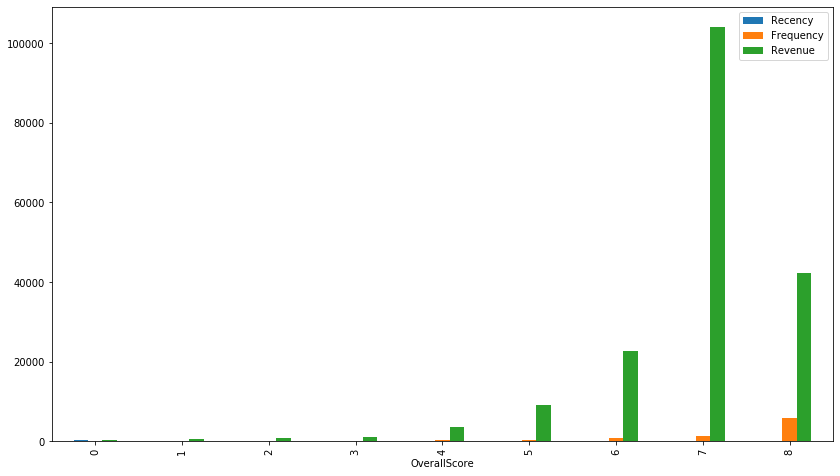

In [48]:
df_plot = data_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()
fig,ax = plt.subplots(figsize=(14,8))
df_plot.plot(kind='bar',ax=ax)

Customers having scores near to zero are worst while those having score near to 8 are best therefore, we divide customers
into three groups based on their overall score 
- __Low Value__ having score from 0 to 2
- __Mid Value__ having score from 3 to 4
- __High Value__ having score 5 or greater than 5

In [38]:
data_user['Segment'] = 'Low-Value'
data_user.loc[data_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
data_user.loc[data_user['OverallScore']>4,'Segment'] = 'High-Value' 

Text(0, 0.5, 'Frequency')

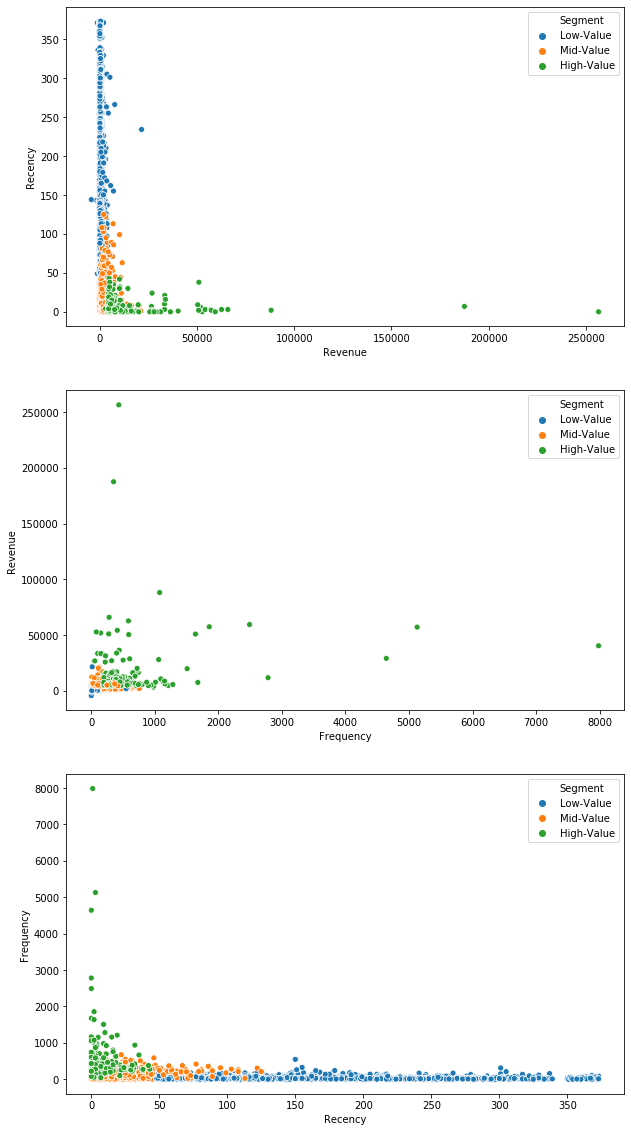

In [39]:
fig= plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
sns.scatterplot(x="Revenue",y="Recency",hue="Segment",data=data_user)
#plt.legend(["Low-Value","Mid-Value","High-Value"],loc='lower left',frameon=False)
plt.xlabel("Revenue")
plt.ylabel("Recency")
ax = fig.add_subplot(3,1,2)
sns.scatterplot(x="Frequency",y="Revenue",hue="Segment",data=data_user)
#plt.legend(["Low-Value","Mid-Value","High-Value"],loc='lower left',frameon=False)
plt.xlabel("Frequency")
plt.ylabel("Revenue")
ax = fig.add_subplot(3,1,3)
sns.scatterplot(x="Recency",y="Frequency",hue="Segment",data=data_user)
#plt.legend(["Low-Value","Mid-Value","High-Value"],loc='lower left',frameon=False)
plt.xlabel("Recency")
plt.ylabel("Frequency")

In [ ]:
# Jenks natural braeks optimizatio